In [71]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# Trocando nomes das colunas
dados = pd.read_csv('unicorns till sep 2022.csv')
dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [73]:
# Renomear colunas
rename = ['Empresa', 'Valor($B)', 'Data de adesão', 'País', 'Cidade', 'Setor', 'Investidor']
dict = {}
for i in range (len(dados.columns)):
    for j in range (len(rename)):
        if i == j:
            dict[dados.columns[i]]=rename[j]

Base_dados = dados.rename(columns = dict)
Base_dados.columns

Index(['Empresa', 'Valor($B)', 'Data de adesão', 'País', 'Cidade', 'Setor',
       'Investidor'],
      dtype='object')

In [74]:
#Ver informações sobre banco de dados e tamanho dos dados
Base_dados.info()
Base_dados.shape #linha,coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor($B)       1186 non-null   object
 2   Data de adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidor      1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


(1186, 7)

In [75]:
#Trocar tipos de dados
#Base_dados['Data de adesão']= pd.to_datetime(Base_dados['Data de adesão'])
Base_dados['Valor($B)'] = Base_dados['Valor($B)'].apply(lambda linha: linha.replace('$',''))
#Não é possivel trocar cada valor na coluna direto precisa de uma função para cada linha
Base_dados['Valor($B)'] = pd.to_numeric(Base_dados['Valor($B)'])


In [76]:
# Ver valores nulos em formato de tabela e gráfico
Base_dados.isnull().sum()
# Análise: Valores nulos na aba investidor não são preocupantes, visto que possa ser que as empresas não necessitaram de investidores 
# externos podendo ter sido financiadas pelos proprios fundadores ou outros meios

Empresa            0
Valor($B)          0
Data de adesão     0
País               0
Cidade             0
Setor              0
Investidor        18
dtype: int64

''

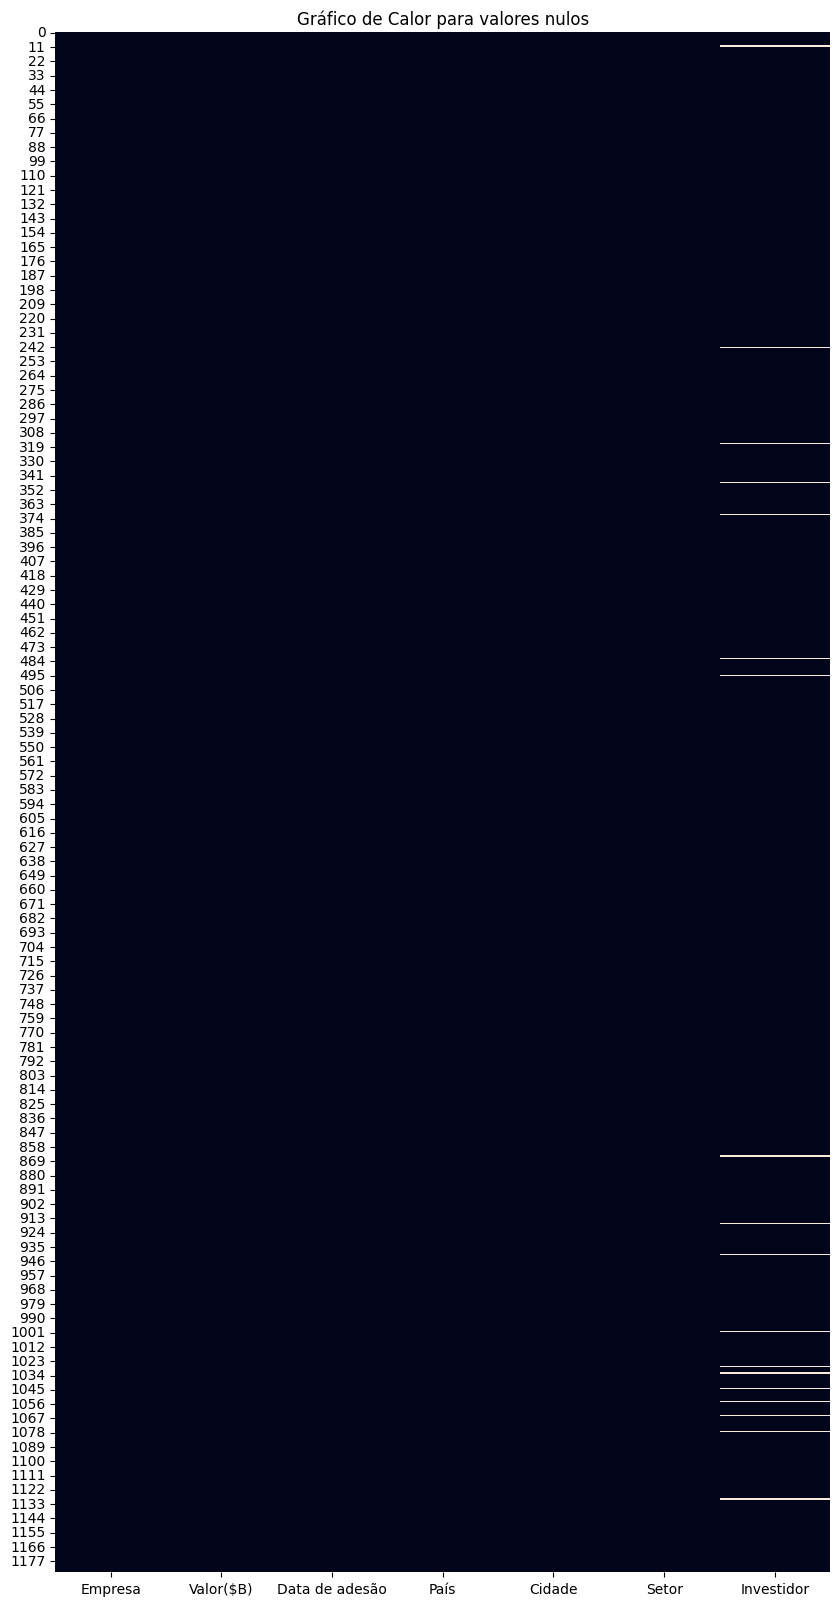

In [77]:
#Ver em formato de gráfico para ver onde estão os valores nulos
plt.figure(figsize= (10,20))
plt.title("Gráfico de Calor para valores nulos", loc="center")
sns.heatmap(Base_dados.isnull(),cbar = False) #Todo boleano não se coloca entre aspas, cbar tira a legenda do lado direito
;

In [78]:
#ver valores unicos
Base_dados.nunique() #Para ver a quantidade em cada coluna

Empresa           1183
Valor($B)          222
Data de adesão     695
País                48
Cidade             286
Setor               34
Investidor        1152
dtype: int64

In [79]:
#Desmembrar coluna de data para fazer analise
Base_dados['Ano']=pd.DatetimeIndex(Base_dados['Data de adesão']).year

In [80]:
Base_dados.head(5)
#Analises a serem feitas
# Analise 1 = distribuição de startups ao decorrer dos anos
# Analise 2 = Setore com maior numero de startups
#Analise 3 = depois fazer subplots com a distribuição od 3 maiores setores ao decorer do tempo em quantidade de startup
#analise 6 = investidores que mais participam das statup
#analise 7 = setores com o maior numero de investidores

,Empresa,Valor($B),Data de adesão,País,Cidade,Setor,Investidor,Ano
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [81]:
#Analise 1 = distribuição de startups ao decorrer dos anos
Analise_1 = Base_dados['Ano'].value_counts().sort_index() #Aqui ele retorna uma tabela
Analise_1

Ano
2007      1
2011      2
2012      4
2013      3
2014     12
2015     34
2016     21
2017     44
2018     98
2019    102
2020    108
2021    529
2022    228
Name: count, dtype: int64

''

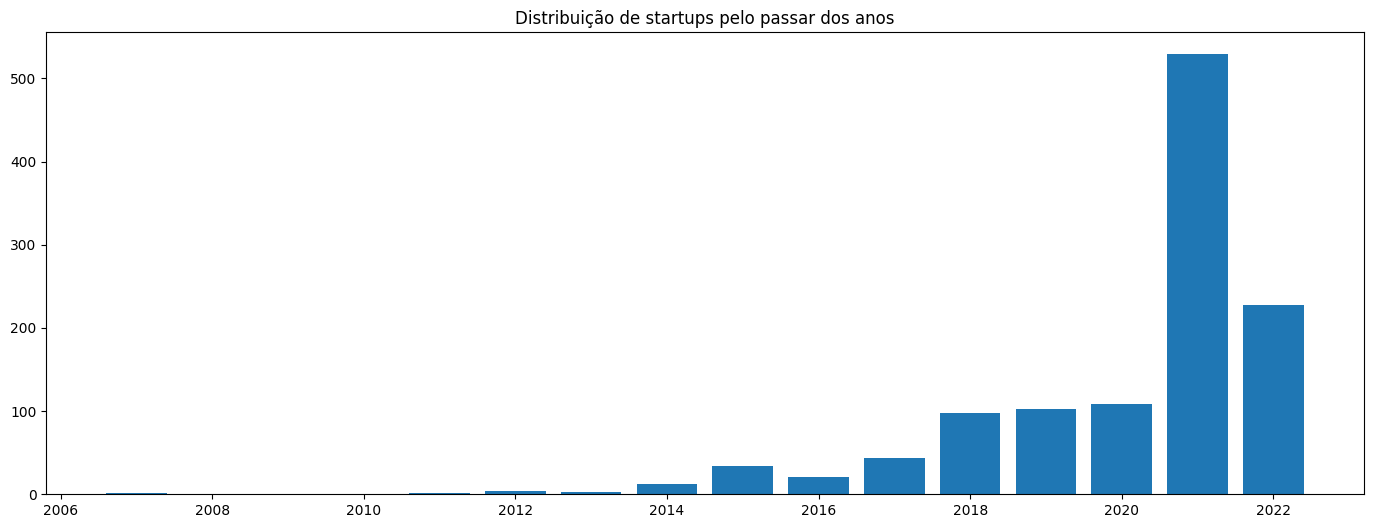

In [82]:
plt.figure(figsize= (17,6))
plt.title("Distribuição de startups pelo passar dos anos")
plt.bar(Analise_1.index, Analise_1.values) #(index,values)
#Analise o número de startups unicornios vinha numa crescente constante, porém no ano de 2021 ouve um aumento de 500%
# podendo ter relação com a pandemia
;

In [83]:
Base_dados['Setor'] = Base_dados['Setor'].apply(lambda linha: linha.capitalize())
Base_dados["Setor"]

0                   Artificial intelligence
1                                     Other
2           E-commerce & direct-to-consumer
3                                   Fintech
4              Internet software & services
                       ...                 
1181           Internet software & services
1182    Supply chain, logistics, & delivery
1183    Supply chain, logistics, & delivery
1184            Data management & analytics
1185           Internet software & services
Name: Setor, Length: 1186, dtype: object

In [84]:
# Analise 2 = Setore com maior numero de startups
Analise_2 = Base_dados.groupby(by= ['Setor']).size().reset_index(name='Qtd') # bom colocar o nome do index que será resetado
Analise_2 = Analise_2.sort_values('Qtd', ascending=False)
Total = Analise_2['Qtd'].sum()
Analise_2['Porcentagem_%'] = round((Analise_2['Qtd']/Total) * 100,1)
Analise_2

,Setor,Qtd,Porcentagem_%
11,Fintech,239,20.2
17,Internet software & services,224,18.9
9,E-commerce & direct-to-consumer,103,8.7
14,Health,94,7.9
2,Artificial intelligence,85,7.2
27,"Supply chain, logistics, & delivery",65,5.5
22,Other,65,5.5
6,Cybersecurity,58,4.9
7,Data management & analytics,45,3.8
3,Auto & transportation,40,3.4


<BarContainer object of 33 artists>

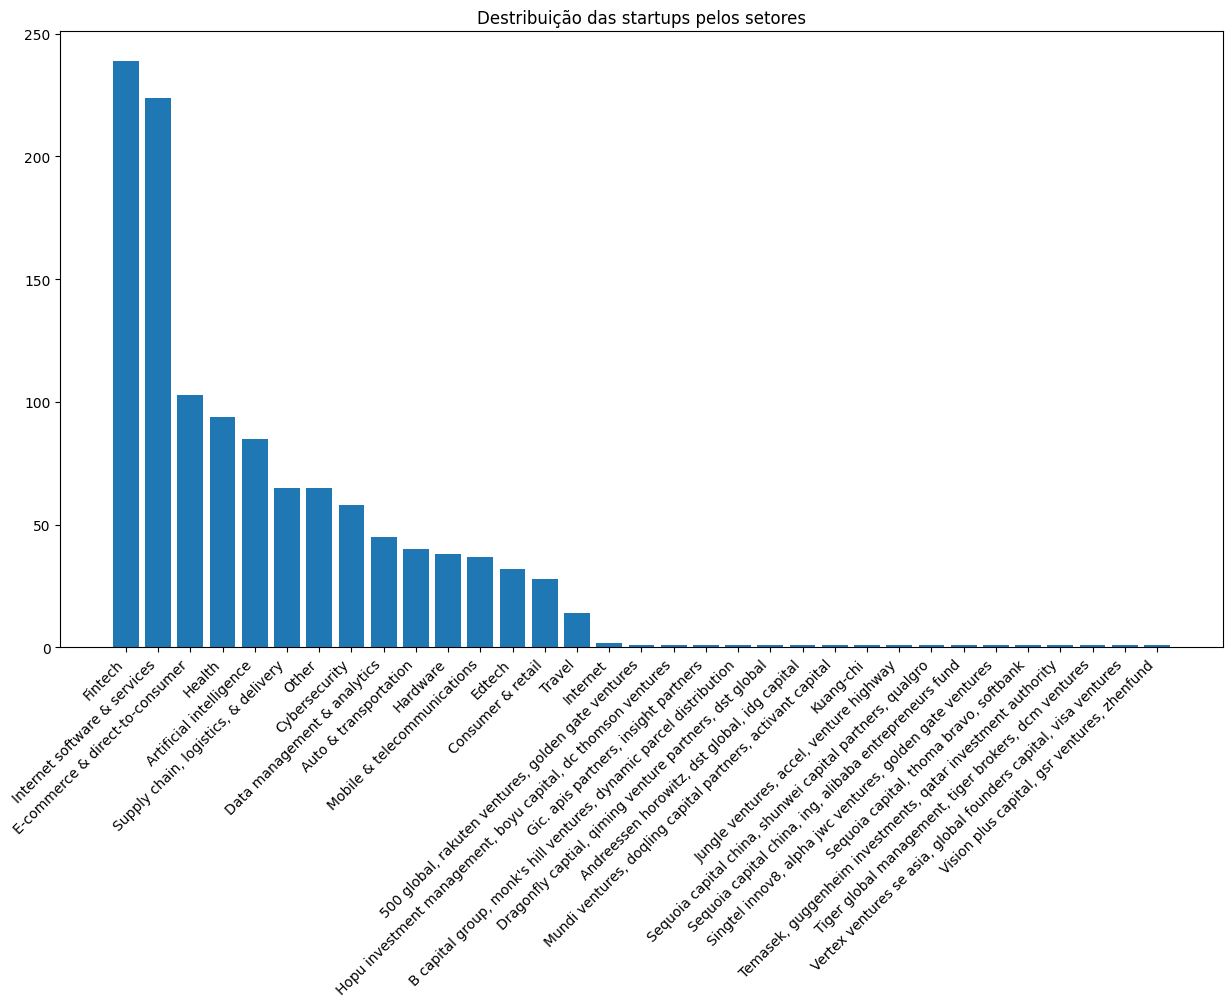

In [85]:
plt.figure(figsize=(15,8))
plt.title('Destribuição das startups pelos setores')
plt.xticks(rotation=45, ha='right')
plt.bar(Analise_2['Setor'],Analise_2['Qtd'])

In [86]:
#Analise 3 = depois fazer subplots com a distribuição od 6 maiores setores ao decorer do tempo em quantidade de startup
Setores = Analise_2['Setor'].head(6).reset_index()
Setores

,index,Setor
0,11,Fintech
1,17,Internet software & services
2,9,E-commerce & direct-to-consumer
3,14,Health
4,2,Artificial intelligence
5,27,"Supply chain, logistics, & delivery"


In [87]:
Analise_3 = Base_dados.groupby(by = ['Ano','Setor']).size().reset_index(name ='QTD')
Analise_3

,Ano,Setor,QTD
0,2007,E-commerce & direct-to-consumer,1
1,2011,Fintech,1
2,2011,Internet software & services,1
3,2012,Artificial intelligence,1
4,2012,Consumer & retail,1
...,...,...,...
138,2022,Internet software & services,48
139,2022,Mobile & telecommunications,4
140,2022,Other,13
141,2022,"Supply chain, logistics, & delivery",14


In [88]:
Analise_3 = Base_dados.groupby(by = ['Ano','Setor']).size().reset_index(name ='QTD')


In [89]:
dict1 = {}
lista1 = []
for i in Analise_3['Setor'].index:
    if Analise_3['Setor'][i]== Setores["Setor"][0]:
       dict1[Analise_3['Ano'][i]] = (Analise_3['QTD'][i])
       x = Analise_3['Setor'][i]
       lista1.append(x)
dict1
dict2 = {}
lista2 = []
for i in Analise_3['Setor'].index:
    if Analise_3['Setor'][i]== Setores["Setor"][1]:
       dict2[Analise_3['Ano'][i]] = (Analise_3['QTD'][i])
       x = Analise_3['Setor'][i]
       lista2.append(x)

dict3 = {}
lista3 = []
for i in Analise_3['Setor'].index:
    if Analise_3['Setor'][i]== Setores["Setor"][2]:
       dict3[Analise_3['Ano'][i]] = (Analise_3['QTD'][i])
       x = Analise_3['Setor'][i]
       lista3.append(x)

dict4 = {}
lista4 = []
for i in Analise_3['Setor'].index:
    if Analise_3['Setor'][i]== Setores["Setor"][3]:
       dict4[Analise_3['Ano'][i]] = (Analise_3['QTD'][i])
       x = Analise_3['Setor'][i]
       lista4.append(x)
dict1

{np.int32(2011): np.int64(1),
 np.int32(2014): np.int64(1),
 np.int32(2015): np.int64(2),
 np.int32(2017): np.int64(5),
 np.int32(2018): np.int64(10),
 np.int32(2019): np.int64(20),
 np.int32(2020): np.int64(15),
 np.int32(2021): np.int64(130),
 np.int32(2022): np.int64(55)}

In [90]:
# Analise 1 = distribuição de startups ao decorrer dos anos
# Analise 2 = Setore com maior numero de startups
#Analise 3 = depois fazer subplots com a distribuição od 3 maiores setores ao decorer do tempo em quantidade de startup
#analise 4 = setores com o maior numero de investidores

''

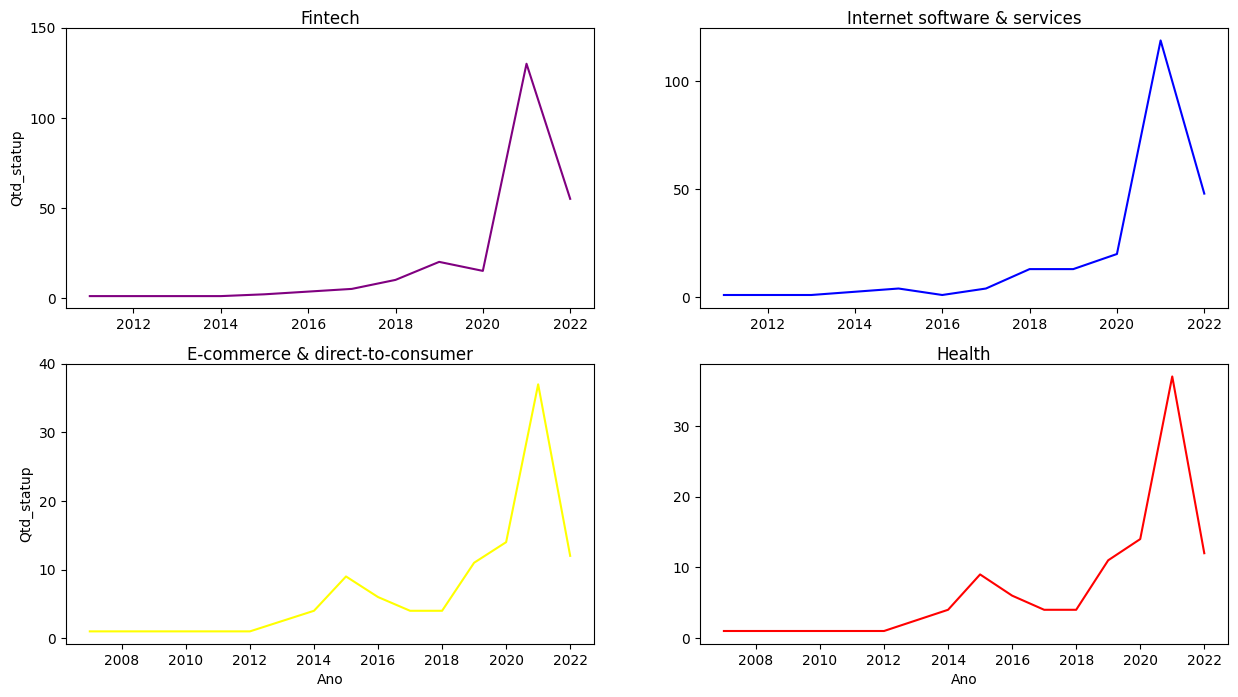

In [91]:
plt.figure(figsize=(15,8))


plt.subplot(2,2,1)
plt.title(f'{lista1[0]}' , pad= 2)
plt.plot(dict1.keys(), dict1.values(), color='purple' )
plt.yticks(ticks= [0,50,100,150])
plt.ylabel('Qtd_statup')

plt.subplot(2,2,2)
plt.title(f'{lista2[0]}' , pad= 2)
plt.yticks(ticks= [0,50,100,200])
plt.plot(dict2.keys(), dict2.values(), color='blue' )


plt.subplot(2,2,3)
plt.title(f'{lista3[0]}' , pad= 0)
plt.plot(dict3.keys(), dict3.values(), color='yellow' )
plt.yticks(ticks= [0,10,20,30,40])
plt.xlabel("Ano")
plt.ylabel('Qtd_statup')


plt.subplot(2,2,4)
plt.title(f'{lista4[0]}' , pad= 2)
plt.yticks(ticks= [0,10,20,30,40])
plt.plot(dict3.keys(), dict3.values(), color='red',  )
plt.xlabel("Ano")

;

In [110]:
#analise 4 = setores com o maior numero de investidores
Base_dados.head()

,Empresa,Valor($B),Data de adesão,País,Cidade,Setor,Investidor,Ano
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [139]:
Analise_4=Base_dados.groupby(by= ['Setor']).count()['Investidor'].sort_values(ascending=False)
Analise_4

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                85
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            36
Edtech                                                                 32
Consumer & retail               

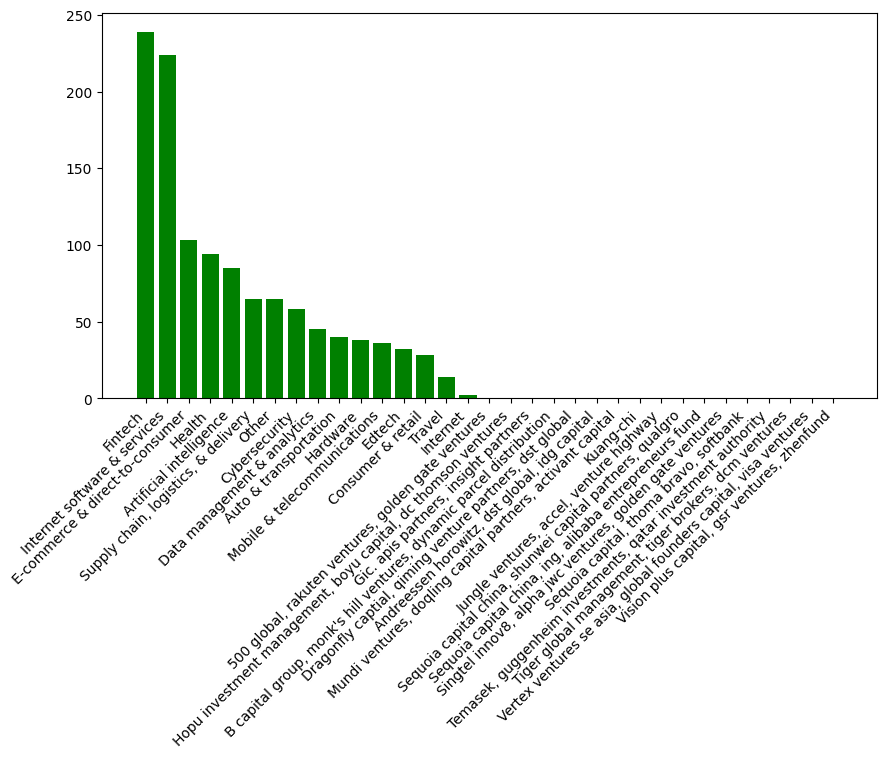

In [146]:
plt.figure(figsize= (10,5))
plt.bar(Analise_4.index,Analise_4.values, color='green')
plt.xticks(rotation=45, ha='right');

#Com essa plotagem podemos confirmar que o setor voltado a tecnologia que vimos crescer nos anos de 2020 e 2021 foram o que mais
# teve investidores, sendo um dos motivos pelo seu crecimento de empresas

In [164]:
Analise_5=Base_dados.groupby(by= ['Setor']).sum()['Valor($B)'].sort_values(ascending=False).reset_index(name='Soma')
Analise_5['Porcentagem'] = (Analise_5['Soma']/Analise_5['Soma'].sum()*100)
Analise_5_=Analise_5.head(4)
Analise_5

,Setor,Soma,Porcentagem
0,Fintech,855.43,22.184273
1,Internet software & services,660.93,17.140212
2,E-commerce & direct-to-consumer,387.19,10.041182
3,Artificial intelligence,330.17,8.562456
4,Other,293.72,7.617180
5,Health,233.16,6.046649
6,"Supply chain, logistics, & delivery",211.47,5.484152
7,Cybersecurity,147.00,3.812221
8,Data management & analytics,141.79,3.677107
9,Auto & transportation,129.47,3.357607


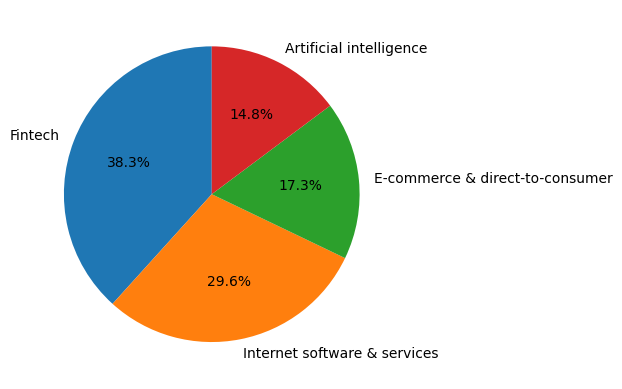

In [166]:
plt.pie(
    Analise_5_['Porcentagem'],
    labels= Analise_5_['Setor'], #outra forma de fazer top10.index[0:10]
    shadow = False, # se eu quero que apareça uma sombra
    startangle= 90, # Onde que será iniciado os valores, pensar na materia de radianos
    autopct= '%1.1f%%'# 1. quantas casas decimais eu quero no resultado, o numero depois do ponto dira quantas casas
);

###Analise Final

Está aumentando o número de starups com o decorrer dos anos, tendo um auemnto significativo após o ano de 2020, podendo ter
relações com a pandemia

De todos os unicornes que apareceram os 5 maiores setores foram Fintechs,internet software and services, e-comerce e health e AI
Plotando esses 4 primeiros vimos um comportamento similiar em todos eles, dando a entender que podem ter sido esses setores
os mais responsaveis pelo crescimento de unicornes nos ultimos anos, dando a entender que empresas que estão envolvidas de certa
forma com tecnoloiga estão produzindo mais unicornios

Foi também notado que estes setores foram os que mais receberam investidores, podendo ser o responsavel por faze-los se desenvolver

Mas quando se observa os 4 setores que mais valem a AI passa o health, dando a entender que memso tendo um número de startups e de
investidores menor conseguiu gerar mais valor no periodo subindo uma posição